In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, auc, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(R'Automobile_insurance_fraud.csv')


# Exploring data

In [3]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df.shape

(1000, 40)

In [5]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [8]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

No null data

In [9]:
# Dropping columns 
df.drop('_c39',axis=1,inplace=True)


In [10]:
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(df[col].unique())) <= 2:
            # Train on the training data
            le.fit(df[col])
            # Transform both training and testing data
            df[col] = le.transform(df[col])
            
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

2 columns were label encoded.


In [11]:
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,1
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,1
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,0
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,1
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,1,?,87200,17440,8720,61040,Honda,Accord,2006,0
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,3,?,108480,18080,18080,72320,Volkswagen,Passat,2015,0
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,3,YES,67500,7500,7500,52500,Suburu,Impreza,1996,0
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,1,YES,46980,5220,5220,36540,Audi,A5,1998,0


<AxesSubplot:>

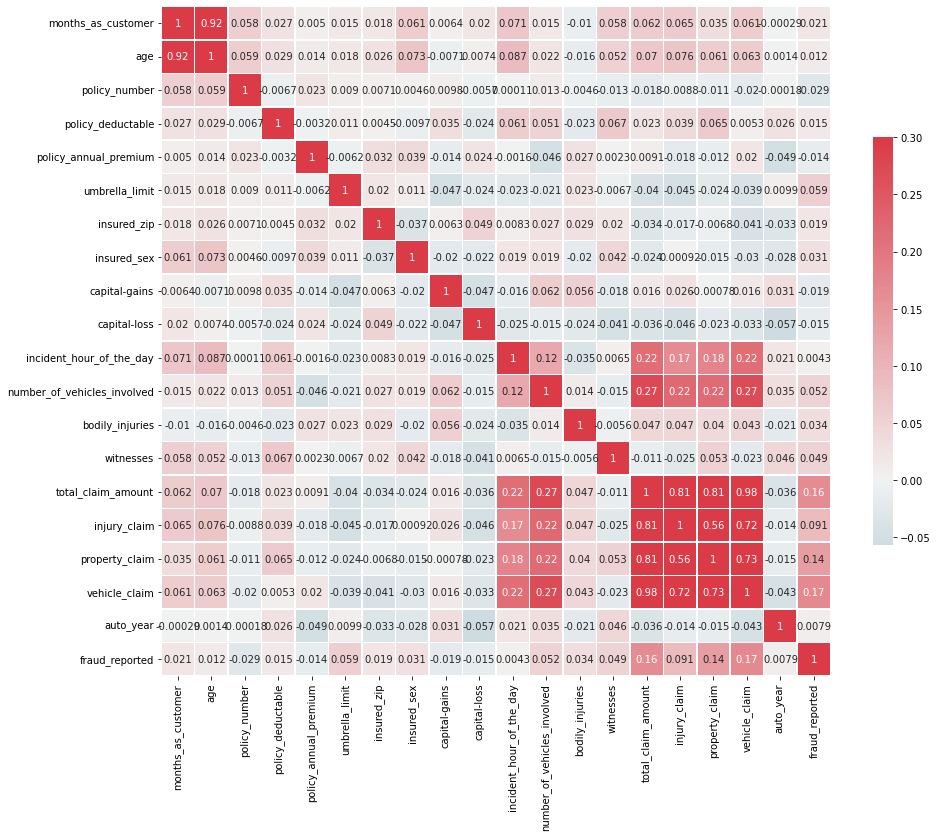

In [12]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), cmap=sns.diverging_palette(220, 10, as_cmap=True), vmax=.3, center=0,annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [13]:
cname =[]
uvalue=[]
# Iterate through the columns
for col in df:
    if df[col].dtype == 'object':
        # If 2 or fewer unique categories
        cname.append(str(col)) 
        uvalue.append(df[col].nunique())
temp= pd.DataFrame()
temp['Col_name'] = cname
temp['Value']= uvalue
            
temp=temp.sort_values('Value',ascending=True)
temp

,Col_name,Value
1,policy_state,3
2,policy_csl,3
16,police_report_available,3
15,property_damage,3
9,collision_type,4
8,incident_type,4
10,incident_severity,4
11,authorities_contacted,5
6,insured_relationship,6
3,insured_education_level,7


In [14]:
df.drop(['incident_location','policy_bind_date','incident_date','auto_model','insured_occupation','policy_number'],axis=1,inplace=True)

<AxesSubplot:xlabel='insured_hobbies', ylabel='count'>

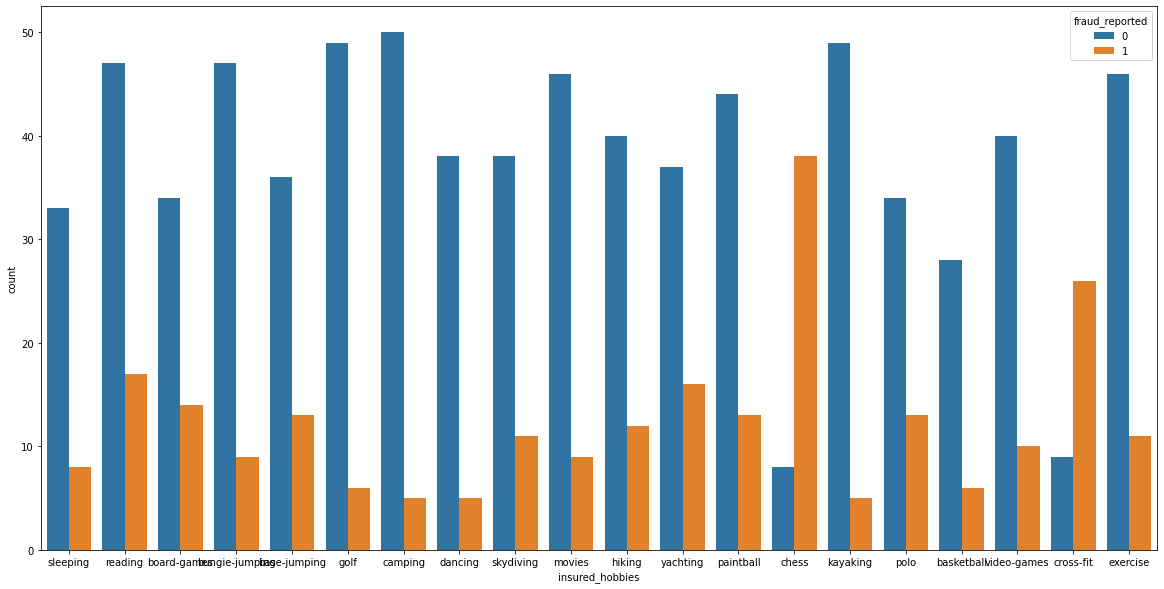

In [15]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='insured_hobbies',hue='fraud_reported',data=df)

<AxesSubplot:xlabel='auto_make', ylabel='count'>

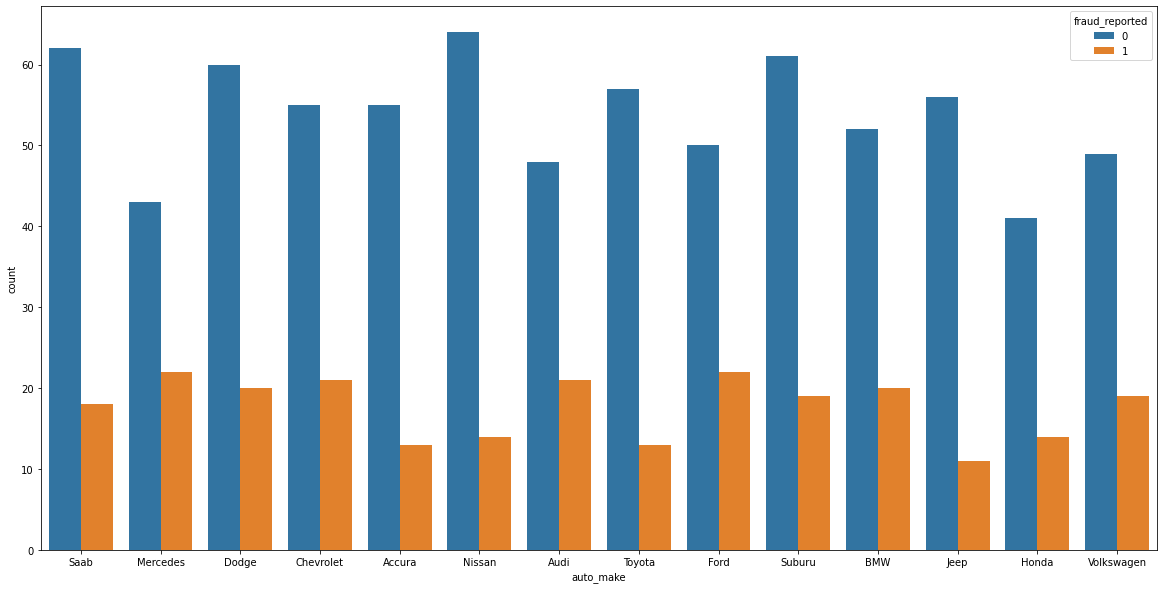

In [16]:
f, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x='auto_make',hue='fraud_reported',data=df)

In [17]:
df = pd.get_dummies(df)
print('Training Features shape: ', df.shape)

Training Features shape:  (1000, 109)


Data balance check

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

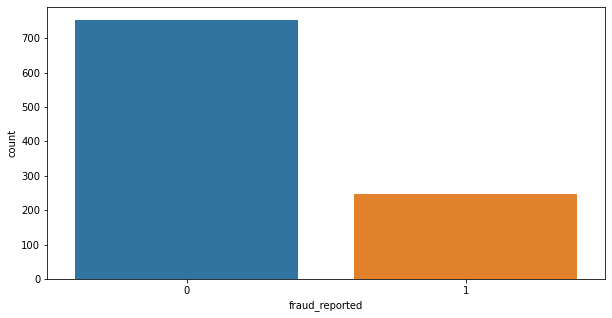

In [18]:
f, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x='fraud_reported',data=df)

Data is not balanced

months_as_customer         AxesSubplot(0.125,0.848277;0.0945122x0.0317227)
age                      AxesSubplot(0.238415,0.848277;0.0945122x0.0317...
policy_deductable        AxesSubplot(0.351829,0.848277;0.0945122x0.0317...
policy_annual_premium    AxesSubplot(0.465244,0.848277;0.0945122x0.0317...
umbrella_limit           AxesSubplot(0.578659,0.848277;0.0945122x0.0317...
                                               ...                        
auto_make_Nissan         AxesSubplot(0.805488,0.315336;0.0945122x0.0317...
auto_make_Saab             AxesSubplot(0.125,0.277269;0.0945122x0.0317227)
auto_make_Suburu         AxesSubplot(0.238415,0.277269;0.0945122x0.0317...
auto_make_Toyota         AxesSubplot(0.351829,0.277269;0.0945122x0.0317...
auto_make_Volkswagen     AxesSubplot(0.465244,0.277269;0.0945122x0.0317...
Length: 109, dtype: object

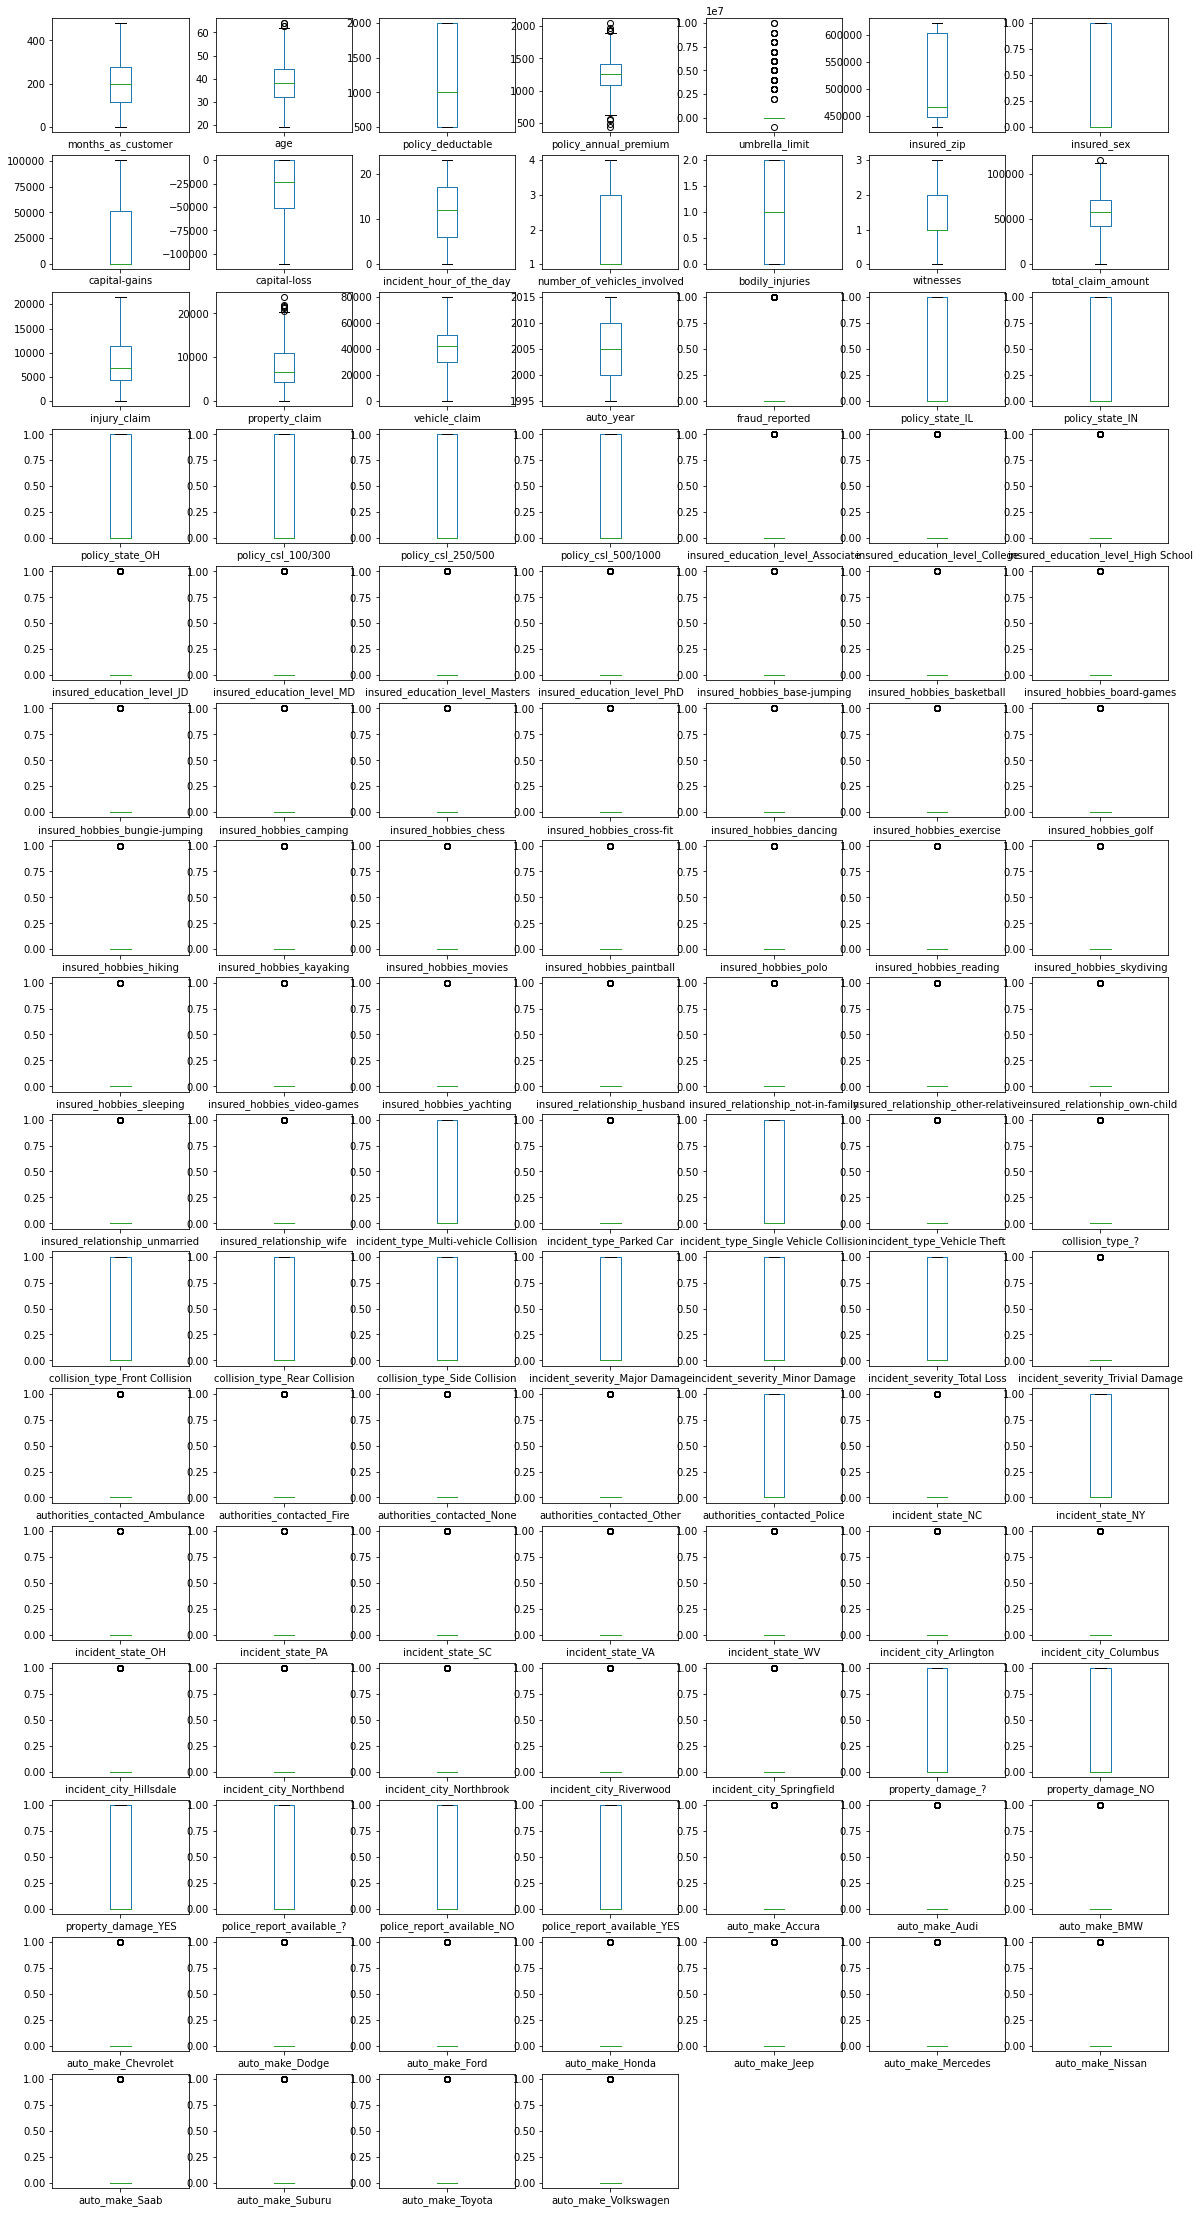

In [39]:
#Plotting boxplot to check outliers
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 20,50
df_new =df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
#checking outliers
df_new.plot(kind='box',subplots=True,layout=(20,7))

Very few outliers are present in policy_annual_premium,age, umbrella_limit and property_claim, hence can be ignored.

In [19]:
corr= df.corr()
y=df['fraud_reported']
x= df.drop('fraud_reported',axis=1)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [21]:
#from imblearn.over_sampling import SMOTE
#sm = SMOTE(random_state = 2)
#X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [41]:
from sklearn.metrics import f1_score

#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
regr = RandomForestClassifier(max_depth=2, random_state=0,n_estimators=100)
regr.fit(X_train, y_train)
regr.fit(X_test, y_test)
y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)
regr.score(X_test, y_test)


0.7333333333333333

In [23]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors =4 )
knn.fit(X_train, y_train)
knn.fit(X_test, y_test)
y_train_pred = knn.predict(X_train)
y_test_pred = knn.predict(X_test)

knn.score(X_test, y_test)

0.7848484848484848

In [24]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dtr = DecisionTreeClassifier()
dtr.fit(X_train,y_train)
y_train_pred = dtr.predict(X_train)
y_test_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.7636363636363637

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
gbr = GradientBoostingClassifier()
gbr.fit(X_train,y_train)
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)


gbr.score(X_test, y_test)

0.7757575757575758

In [26]:
#Ridge
from sklearn.linear_model import Ridge
ridgeMod = Ridge(alpha=0.01, normalize=True)
ridgeMod.fit(X_train, y_train)
ridgeMod.fit(X_test, y_test)
ridge_model_pred = ridgeMod.predict(X_test)
ridgeMod.score(X_test, y_test)

0.5813503429120501

In [27]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg.fit(X_test, y_test)
logreg_pred = logreg.predict(X_test)
logreg.score(X_test, y_test)


/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/pallavishu/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.7242424242424242

In [28]:
svc = SVC()
svc.fit(X_train, y_train)
svc.fit(X_test, y_test)
svc_pred = svc.predict(X_test)
svc.score(X_test, y_test)

0.7333333333333333

In [29]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
gaussian.fit(X_test, y_test)
gaussian_pred = gaussian.predict(X_test)
gaussian.score(X_test, y_test)

0.6151515151515151

In [42]:
accuracy_dict = {"RandomForestRegressor": regr.score(X_test, y_test),
                 "KNeighborsRegressor": knn.score(X_test, y_test),
                 "DecisionTreeRegressor": dtr.score(X_test, y_test),
                 "GradientBoostingRegressor": gbr.score(X_test, y_test),
                 "Ridge": ridgeMod.score(X_test, y_test),
                "LogisticRegression": logreg.score(X_test, y_test),
                "Support Vector Regressor": svc.score(X_test, y_test),
                "GaussianNB":gaussian.score(X_test, y_test) }

accuracy_df = pd.DataFrame( pd.Series(accuracy_dict, index = accuracy_dict.keys()), columns = ["Accuracy"])
accuracy_df

,Accuracy
RandomForestRegressor,0.733333
KNeighborsRegressor,0.784848
DecisionTreeRegressor,0.763636
GradientBoostingRegressor,0.775758
Ridge,0.581350
LogisticRegression,0.724242
Support Vector Regressor,0.733333
GaussianNB,0.615152


In [43]:
#Saving and loading the model
import pickle
file_name = "churn.pkl"
pickle.dump(gbr,open(file_name,"wb"))
#loading model
loaded_model = pickle.load(open("churn.pkl","rb"))
result = loaded_model.score(X_test,y_test)